In [19]:
# Import Required Libraries
import os
import xarray as xr
import zarr

# Function to convert NetCDF files in a directory to a Zarr store
def convert_netcdf_to_zarr(input_directory, output_zarr_store):
    # List all .nc files in the input directory
    netcdf_files = [os.path.join(input_directory, f) for f in os.listdir(input_directory) if f.endswith('.nc')][0:2]
    print(netcdf_files)
    # Open all NetCDF files as a single xarray dataset
    datasets = [xr.open_dataset(nc_file) for nc_file in netcdf_files]
    combined_dataset = xr.concat(datasets, dim='t')
    return combined_dataset
    # Save the combined dataset to a Zarr store
    #combined_dataset.to_zarr(output_zarr_store, mode='w')

# Define the input directory and output Zarr store
input_directory = r"..\data\PRISM\2000"  # Replace with the path to your directory
output_zarr_store = r"..\data\zarr" # Replace with the desired output path

# Convert NetCDF files to Zarr store
zf = convert_netcdf_to_zarr(input_directory, output_zarr_store)

# Print confirmation
print(f"Zarr store created at: {output_zarr_store}")

['..\\data\\PRISM\\2000\\PRISM_temp_20000101.nc', '..\\data\\PRISM\\2000\\PRISM_temp_20000102.nc']
Zarr store created at: ..\data\zarr


In [23]:
zf.ZipStore(r"..\data\zarr\test.zip", mode='w')

AttributeError: 'Dataset' object has no attribute 'ZipStore'

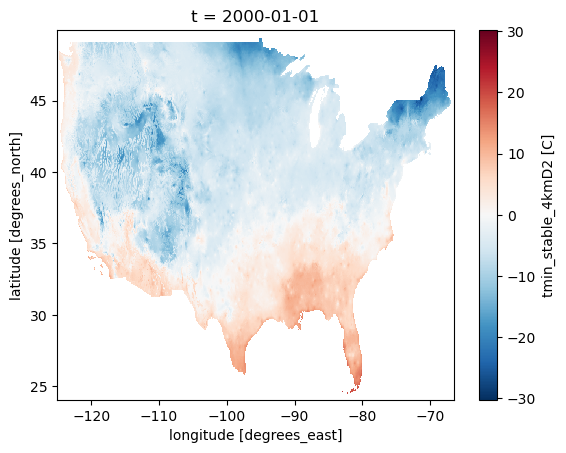

In [25]:
zf['tmin'].isel(t=0).plot()

In [6]:
#write blank csv to output directory
import pandas as pd
df = pd.DataFrame()
df.to_csv(r"..\data\zarr\blank.csv")


In [8]:
if os.access(output_zarr_store, os.W_OK):
    print(f"Directory {output_zarr_store} is writable.")
    

Directory ..\data\zarr is writable.


In [12]:
import time
attempts = 0
while attempts < 10:
    try:
        zf.to_zarr(output_zarr_store, mode='w')
        break
    except PermissionError as e:
        time.sleep(0.1)
        attempts += 1
if attempts == 10:
    raise e

NameError: name 'e' is not defined